### <b>MIDTERM REVIEW</b>

In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.quantum_info.operators import Operator
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-10-05 12:48:53,663: Credentials are already in use. The existing account in the session will be replaced.


<b>Problem 1.</b> Consider the following quantum circuit:

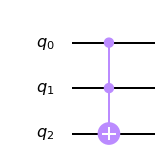

In [32]:
q = QuantumRegister(3,name='q')
qc = QuantumCircuit(q)
qc.ccx(q[0], q[1], q[2])
qc.draw()

(a) What are the outputs for |001> and |101> ? 

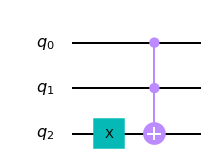

In [33]:
#output for |001>
q = QuantumRegister(3,name='q')
qc = QuantumCircuit(q)
qc.x(q[2])
qc.ccx(q[0], q[1], q[2])
qc.draw()

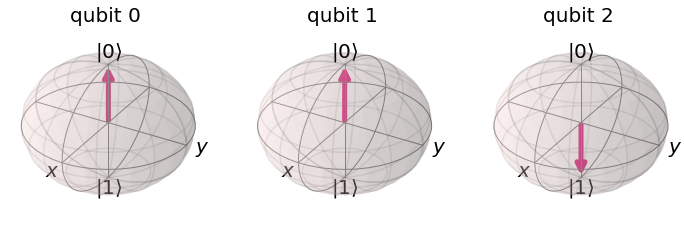

In [34]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

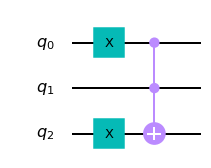

In [35]:
#output for |101>
q = QuantumRegister(3,name='q')
qc = QuantumCircuit(q)
qc.x(q[0])
qc.x(q[2])
qc.ccx(q[0], q[1], q[2])
qc.draw()

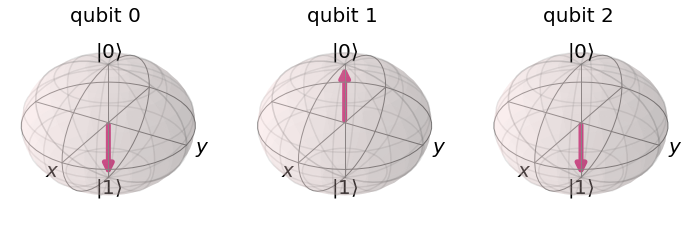

In [36]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

(b) What does this circuit do according to the inputs?

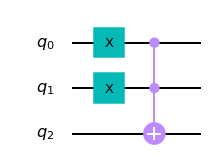

In [38]:
# If input is |11b>, the output will be |11 inv(b)>. Thus, |110>--> |111> and |111>--> |110>.
#output for |110> --> |111>
q = QuantumRegister(3,name='q')
qc = QuantumCircuit(q)
qc.x(q[0])
qc.x(q[1])
qc.ccx(q[0], q[1], q[2])
qc.draw()

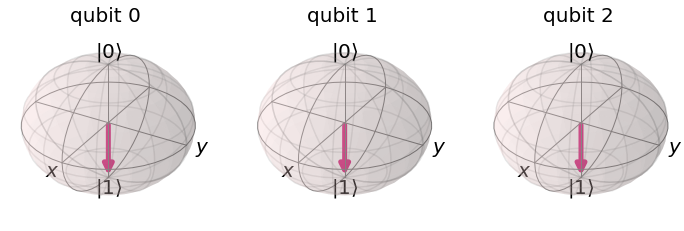

In [39]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

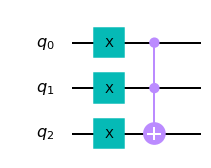

In [40]:
#output for |111>-->|110>
q = QuantumRegister(3,name='q')
qc = QuantumCircuit(q)
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.ccx(q[0], q[1], q[2])
qc.draw()

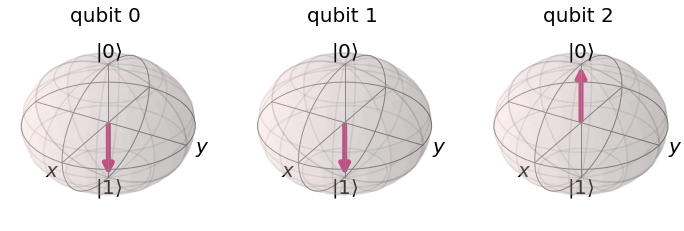

In [41]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

<b>Problem 2.</b> The Operator class is used in Qiskit to represent matrix operators acting on a quantum system. It has several methods to build composite operators using tensor products of smaller operators, and to compose operators.

In [44]:
op = Operator([[1, 0, 0, 0], 
               [0, 1, 0, 0], 
               [0, 0, 1, 0], 
               [0, 0, 0, 1]])
op.label='op'
op

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

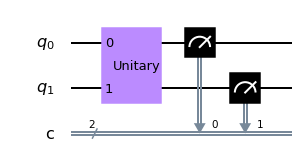

In [45]:
qb = QuantumRegister(2, name='q')
cb = ClassicalRegister(2, name='c')
circ = QuantumCircuit(qb, cb)
circ.append(op, [0, 1])
circ.measure([0,1], [0,1])
circ.draw('mpl')

Rewrite the following circuit, using the Operator class instead of Hadamard and NOT gates. 

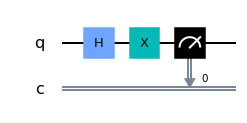

In [46]:
qb = QuantumRegister(1, name='q')
cb = ClassicalRegister(1, name='c')
circ = QuantumCircuit(qb, cb)
circ.h(qb[0])
circ.x(qb[0])
circ.measure([0],[0])
circ.draw('mpl')

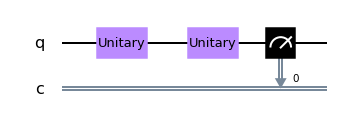

In [48]:
#Building the circuit
import math
hadG = Operator([[1/math.sqrt(2),1/math.sqrt(2)],
                [1/math.sqrt(2),-1/math.sqrt(2)]])
notG = Operator([[0,1],
                [1,0]])

qb = QuantumRegister(1, name='q')
cb = ClassicalRegister(1, name='c')
circ = QuantumCircuit(qb, cb)
circ.append(hadG, [0])
circ.append(notG, [0])
circ.measure([0], [0])
circ.draw('mpl')

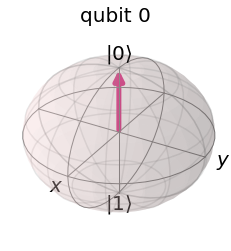

In [13]:
#Comparing the outputs
qb = QuantumRegister(1, name='q')
cb = ClassicalRegister(1, name='c')
circ = QuantumCircuit(qb, cb)
circ.h(qb[0])
circ.x(qb[0])
circ.measure([0],[0])

backend = Aer.get_backend("statevector_simulator")
statevector = execute(circ, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

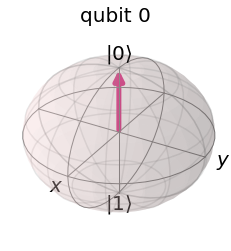

In [15]:
import math
hadG = Operator([[1/math.sqrt(2),1/math.sqrt(2)],
                [1/math.sqrt(2),-1/math.sqrt(2)]])
notG = Operator([[0,1],
                [1,0]])

qb = QuantumRegister(1, name='q')
cb = ClassicalRegister(1, name='c')
circ = QuantumCircuit(qb, cb)
circ.append(hadG, [0])
circ.append(notG, [0])
circ.measure([0], [0])

backend = Aer.get_backend("statevector_simulator")
statevector = execute(circ, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

<b>Problem 3.</b> 
Suppose you have a positive integer that is a power of two, represented in a 4-qubit system (|0010>, for instance). Implement the operations of multiplication and division by 2 efficiently, without using other arithmetic operations (addition, subtraction, multiplication and division).

 0123                            01   23
 
|0010> (2) |0010>x2=|0100> (4)  |00<->10>

                                 012   3
                                 
|0010> (2) |0010>/2=|0001> (1)  |001<->0>


|1000> x 2 = 1|0000>


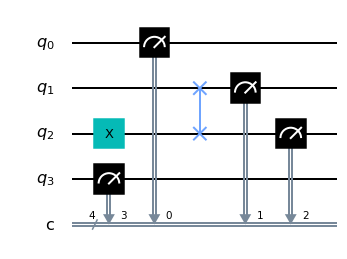

In [49]:
#multiplication

def multiply(i,circ):
    circ.swap(qb[i],qb[i-1])
    circ.measure([0,1,2,3],[0,1,2,3])
    return circ

qb = QuantumRegister(4, name='q')
cb = ClassicalRegister(4, name='c')
qc = QuantumCircuit(qb, cb)
qc.x(qb[2])
qc=multiply(2,qc)
qc.draw()


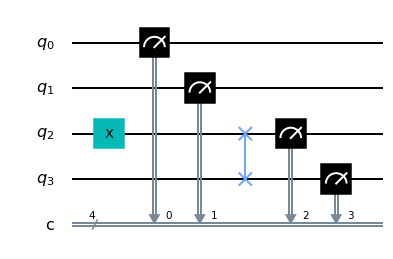

In [50]:
#division

def division(i,circ):
    circ.swap(qb[i],qb[i+1])
    circ.measure([0,1,2,3],[0,1,2,3])
    return circ

qb = QuantumRegister(4, name='q')
cb = ClassicalRegister(4, name='c')
qc = QuantumCircuit(qb, cb)
qc.x(qb[2])
qc=division(2,qc)
qc.draw()

<b> Problem 4.</b> Consider the following

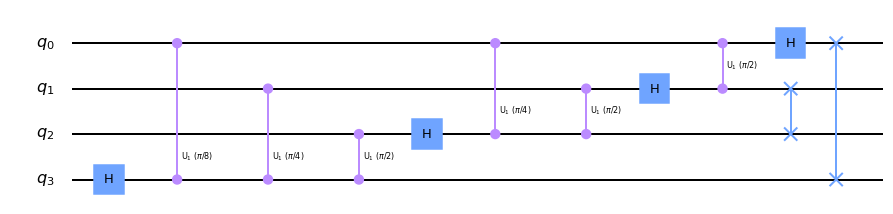

In [51]:
from math import pi

def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cu1(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)
    
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

qc = QuantumCircuit(4)
qft(qc,4)
qc.draw('mpl')

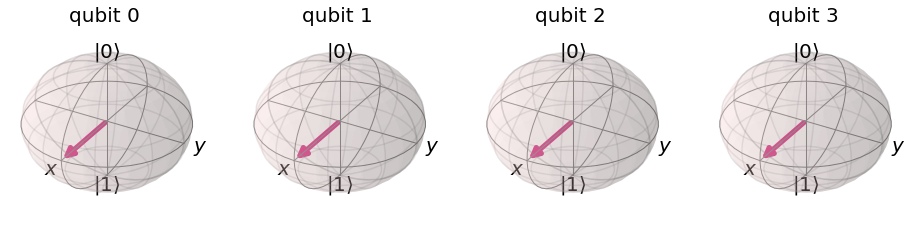

In [52]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

Implement the inverse of the Fourier Transform.

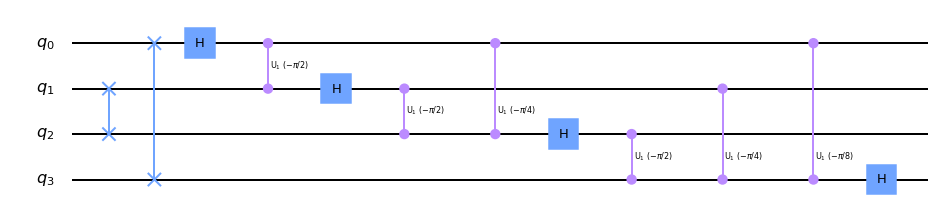

In [53]:
def inverse_qft(circuit, n):
    qft_circ = qft(QuantumCircuit(n), n)
    invqft_circ = qft_circ.inverse()
    return invqft_circ

qc = QuantumCircuit(4)
iqft=inverse_qft(qc, 4)
iqft.draw('mpl')


### <b> NEXT STEPS... </b>

<b> 07 October:</b> Extra Office-Hours (09:45 AM to 11:45AM)

<b> 12 October:</b> Holiday (NO CLASSES)

<b> 14 October:</b> MIDTERM

